In [1]:
from altaipony.lcio import from_mast, from_path
import numpy as np
import matplotlib.pyplot as plt

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Find and download the TargetPixelFile for your light curve:

In [72]:
flc = from_mast("10646889", mode="LC", c=14, mission="Kepler")

9% (413/4757) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
9% (413/4757) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:102: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/Kepler/kplr010646889_lc_Q111111111111111111/kplr010646889-2012277125453_llc.fits' mode='rb' closefd=True>
  c)


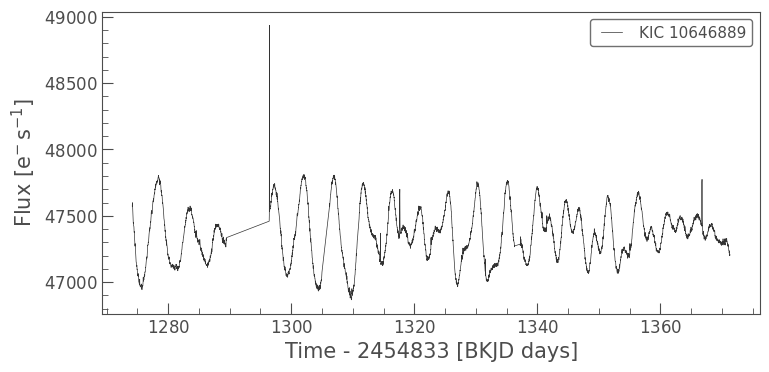

In [73]:
flc.plot();

Find the gaps in the light curve to inform the de-trending algorithm. 

The de-trending splits the light curve in continuous chunks to avoid flukes from over-fitting.

In [88]:
flcd = flc.detrend("savgol", window_length=59)

Now you can visually compare the results:

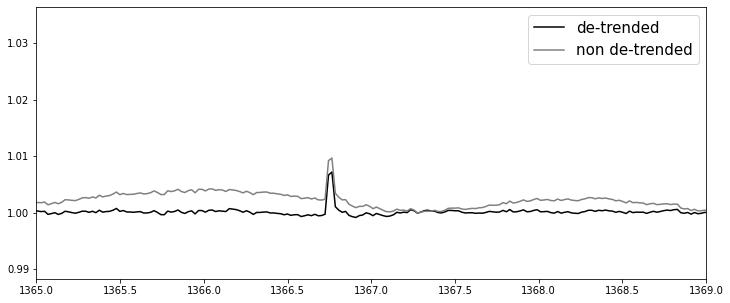

In [91]:
%matplotlib inline
plt.figure(figsize=(12,5))

plt.plot(flcd.time,flcd.detrended_flux / np.nanmedian(flcd.detrended_flux), c="k", label="de-trended")
plt.plot(flcd.time, flcd.flux / np.nanmedian(flcd.flux)+0.001, c="grey", label="non de-trended")
plt.xlim(1365,1369)
plt.legend(fontsize=15);

### The above figure shows a flare that we can now try to find in the de-trended light curve:

In [92]:
flcd = flcd.find_flares()
flcd.flares.sort_values(by="ed_rec", ascending=False)

Found 3 candidate(s) in the (0,734) gap.
Found 0 candidate(s) in the (734,1152) gap.
Found 2 candidate(s) in the (1152,2615) gap.
Found 2 candidate(s) in the (2615,4269) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
6,4046,4049,61556,61559,1366.744610,1366.805909,25.553000,0.402576,0.007049,0.061299,4269.0
3,1708,1712,59152,59156,1317.622888,1317.704622,25.271116,0.430645,0.006587,0.081734,4269.0
0,1,5,57026,57030,1274.180596,1274.262332,8.194404,0.530883,0.001365,0.081736,4269.0
2,522,525,57562,57565,1285.133208,1285.194510,3.604176,0.453776,0.000885,0.061302,4269.0
4,2588,2591,60040,60043,1335.767825,1335.829125,3.004066,0.452105,0.000761,0.061300,4269.0
1,337,340,57372,57375,1281.250758,1281.312060,2.571440,0.464555,0.000531,0.061302,4269.0
5,3298,3301,60801,60804,1351.317573,1351.378873,2.554512,0.463625,0.000516,0.061300,4269.0


How likely are such flares recovered, what is their true energy prior to noise and de-trending systematics? 

-> Check out `TESS_Light_Curves_with_Flares.ipynb`.



Questions? Something does not work? Email me @ eilin@aip.de 